Questions:

1. How does the Celtic's shooting stats change from the 22-23 season to 23-24 season when playing the Mavericks.  
2. Compare assist to turnover ratio based on 5 main players vs lineup with subs (5th, 6th, etc players off the bench).  

3. How well does Jayson Tatum do in offense vs other starters on the court per game.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Grab data from repo
#!wget -O Player_Stats.xlsx "https://github.com/JeffYu12/Group-Project-/raw/main/Player%20Stats.xlsx"
data = pd.read_excel("Player Stats.xlsx", sheet_name=None)

In [ ]:
# Convert sheet stats to dataframes
cel = data['Shooting Stats 22-23']
mav = data['Shooting 23-24 vs Mavs']

In [ ]:
# Set the index to be the names of the players
cel.set_index('Name', inplace=True)
mav.set_index('Name', inplace=True)

In [ ]:
# Find the intersection of players from both sets
common_index = cel.index.intersection(mav.index)

# Subset dataframes so only common indecies occur 
cel_common = cel.loc[common_index]
mav_common = mav.loc[common_index]

# Reset indecies and melt the dataframe to enhance seaborn compatability
cel_melted = cel_common.reset_index().melt(id_vars=["Name"], var_name="Stat", value_name="Value")
mav_melted = mav_common.reset_index().melt(id_vars=["Name"], var_name="Stat", value_name="Value")

In [ ]:
# Add source column to melted dataframes
cel_melted["Source"] = "Celtics 22-23"
mav_melted["Source"] = "Mavericks 23-24"

In [ ]:
# Concatonate the 2 dataframes
combined_df = pd.concat([cel_melted, mav_melted], ignore_index=True)

In [150]:
# Subset melted dataframe into % and non-% stat values, for later visualization
percent_df = combined_df[combined_df['Stat'].str.contains('%')]
not_percent_df = combined_df[~combined_df['Stat'].str.contains('%')]

C:\Users\FTrou\AppData\Local\Temp\ipykernel_45564\68060178.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Stat", y="Value", hue="Source", data=not_percent_df, dodge=True, ci=None, ax=ax)


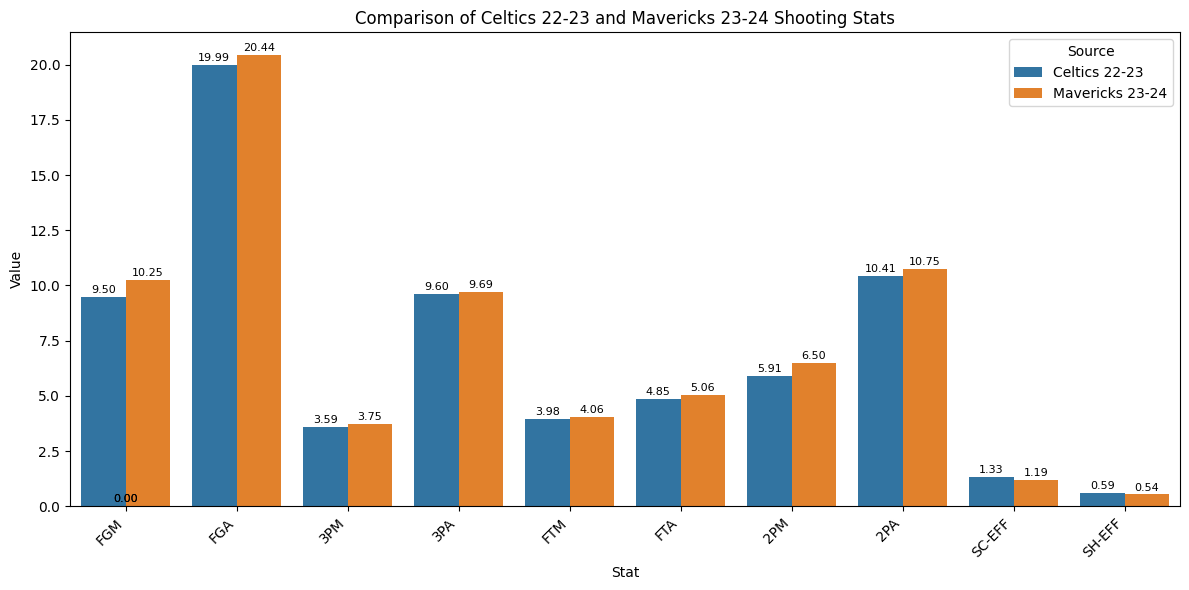

In [151]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar graph
sns.barplot(x="Stat", y="Value", hue="Source", data=not_percent_df, dodge=True, ci=None, ax=ax)

# Add values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=8, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and adjust layout
ax.set_title("Comparison of Celtics 22-23 and Mavericks 23-24 Shooting Stats")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure
fig.savefig("shooting_stats_comparison.png", dpi=300, bbox_inches="tight")

C:\Users\FTrou\AppData\Local\Temp\ipykernel_45564\145789607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_df['Norm'] = percent_df['Value']/100
C:\Users\FTrou\AppData\Local\Temp\ipykernel_45564\145789607.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Stat", y="Norm", hue="Source", data=percent_df, dodge=True, ci=None, ax=ax)


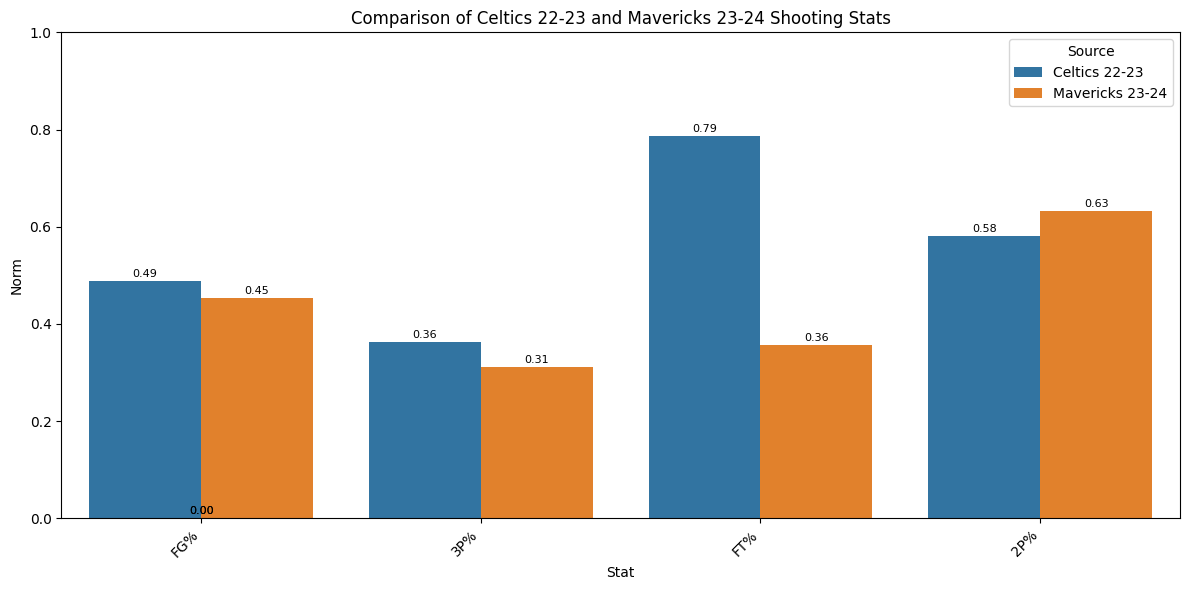

In [156]:
# Normalize thevalues between 0 and 1 for the percent data
percent_df['Norm'] = percent_df['Value']/100

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar graph
sns.barplot(x="Stat", y="Norm", hue="Source", data=percent_df, dodge=True, ci=None, ax=ax)

# Add values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=8, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and adjust layout
ax.set_title("Comparison of Celtics 22-23 and Mavericks 23-24 Shooting Stats")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Set y lim from 0-1
ax.set_ylim(0, 1)

# Save the figure
fig.savefig("shooting_stats_comparison.png", dpi=300, bbox_inches="tight")